# Computer Lab - Semester 3

## Solution of ODE

#### Euler's Method

Any equation which involves derivative of a function is called a **differential equation**. Order of the differential equation is defined by the order of the derivative of the function present in the differential equation. A first order linear differential equation is represented by

\begin{equation}
\frac{dy}{dx}=f(x,y(x))
\end{equation}

To solve this type of equation numerically, we are given an initial condition, i.e. the value of the function at the initial point. If $x=a$ is the starting point, then we must get the value $y(a)$ at $x=a$. Let $y(a)=c$. Geometrically, it is quite obvious that the function $y(x)$ must pass through $(a,c)$. Therefore, the equation of tangent line drawn at the point (a,c) in xy coordinate plane can be written as -

\begin{align}
y - c = \frac{dy}{dx}\mid_{(a,c)}(x - a)
\end{align}

Now, $\frac{dy}{dx}\mid_{(a,c)}=f(a,c)$. Setting, $x-a=h$ as step size or distance between two neighbouring points, we can write the above equation as

\begin{align}
y(a+h) \approx c + f(a,c)\cdot h
\end{align}

Thus the solution passes through a point which is nearly equal to $(a+h, c+f(a,c)h)$. We now repeat this tangent line approximation with (a,c) with successive points separated by a distance $h$. We must replace $(a,c)$ by $(a+h, c+f(a,c)h)$. Keep repeating this tangent line approximation at successive points $x=a,~a+h,~a+2h,\cdots,b$, we get the values of $y(x)$ for all the points between $x=a$ to $x=b$.

Algebraically, the basic idea can be understood in the following way. From calculas, the derivative of a function at a point is given by

\begin{align}
\frac{dy}{dx} = \lim_{h\to 0}\frac{y(x+h)-y(x)}{h}
\end{align}

Here $h>0$ and very small. The above equation can be approximately written as

\begin{align}
\frac{dy}{dx} \approx \frac{y(x+h)-y(x)}{h}
\end{align}

This equation can be solved for $f(x+h)$ to give

\begin{align}
f(x+h) \approx y(x) + h\cdot f(x,y(x))
\end{align}

If we call $y(x+h)$ as "new value", then we can write the above equation as

\begin{align}
y_{\text{new}} = y +h \cdot f(x,y)
\end{align}

We can demonstrate the implementation of Euler's method by using the following tabular format -

| $x$     | $y$                 | $$h\cdot f(x,y)$$|
| :---    | :---                | :---           |
|$a$      | $c$                 | $$h\cdot f(a,c)$$| 
|$a+h$    | $$c + h\cdot f(a,c)$$ | $\cdots$       |
|$a + 2h$ | $\cdots$            |                | 
|$\vdots$ |                     |                |
|$b$      | ???                 | X              |

The goal is to fill out all the blanks of the table except X entry and find the ??? entry, which is the Eulerâ€™s method approximation for $y(b)$.

Consider the following ODE
\begin{align}
\frac{dy}{dx}=\frac{y+x}{y-x},\hspace{0.5cm}y(0)=1
\end{align}
Find the value y at x = 0.6, taking the step size = 0.2.

x         y    
------------------
0.0    1.000
0.2    1.200
0.4    1.480
0.6    1.828
------------------


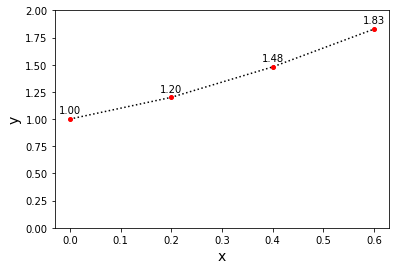

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Discretize the independent variable 'x'
x_init, x_final, step = 0, 0.6, 0.2
x = np.arange(x_init, x_final+step, step)

#Create array for unknown or dependent variable
y = np.zeros(len(x))
y[0] = 1

# Define helper functions
def f(x,y):
	slope = (y+x)/(y-x)
	return slope

def Euler(x, y, h):
	y_new = y + h*f(x, y)
	return y_new

# use recursive relation to find the 'y' values at different grid points of 'x'
h = step
for i in range(len(x)-1):
    y[i+1] = Euler(x[i], y[i], h)

# Tabulating the result
y = y.reshape([-1,1])
x = x.reshape([-1,1])

val = np.hstack([x, y])

print("{0:10s}{1:5s}".format('x','y'))
print('------------------')
for i in range(len(val[:,0])):
    print("{0:0.1f} {1:8.3f}".format(val[:,0][i], val[:,1][i]))
print('------------------')

# Graphical demonstration
plt.plot(x, y, ls=':', color='k', markersize=4)
plt.plot(x, y, 'ro', markersize=4)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

# Displaying values next to point
for i in range(len(y)):
	plt.text(x[i], y[i]+0.05, "%0.2f" %y[i], ha="center")
plt.ylim(0, 2)
plt.show()

#### Modified Euler method

The biggest shortcoming in Euler's method is that the derivative or slope estimated at the begining of the interval is applied through out the interval which generally, is not the case. As a modification, the derivative is estimated at the begining and at the end of the interval and average of the two values is used to estimate the value at the next stage. So, if we consider an interval between $x$ and $x+h$ and the value of $y(x)$ is known, then to estimate the value at $x+h$, we calculate the slope at $x$, which is $\frac{dy}{dx}$ and estimate $y(x+h)$ which is given by

\begin{align}
y(x+h) = y(x) + h\cdot f(x,y)
\end{align}

Let us call this value of $y(x+h)$ as predicted value of $y$ or $y_p$. Using the value of $y_p$, we estimate the slope at $x+h$ which is given by $f(x+h, y_p)$. Let us call

\begin{align}
&k_1 = f(x,y)\\
&k_2 = f(x+h, y_p)
\end{align}

We use the average of $k_1$ and $k_2$ to estimate the value at $x+h$, given by

\begin{align}
y(x+h) = y(x) + \left( \frac{k_1+k_2}{2}\right) \cdot h
\end{align}

This value of $y(x+h)$ is known as *corrector* value or $y_c$.

The previous problem can be solved by modified Euler method by modifying the code in the Euler function. The code snippet is given below.

In [2]:
def modEuler(x, y, h):
    k1 = f(x, y)
    y_p = y + k1*h
    k2 = f(x+h, y_p)
    y_c = y + h*(k1+k2)/2
    return y_c

#### Runge Kutta Method of Second Order

In this method. we estimate the slope at the middle of the interval $(x, x+h)$. Let $f(x, y)$ be the slope at $x$ and the slope at $x+h/2$ be $f(x+h/2, y+k1/2)$. Considering this slope is better estimate for the interval, we use it for the whole interval to estimate the value at $x+h$. This can be shown below -
\begin{align}
&k_1 = f(x,y) \nonumber\\
&k_2 = (x+\frac{h}{2}, y + \frac{h}{2}k_1)\nonumber\\
&y(x+h) = y(x) + h\cdot k_2
\end{align}

Solve the differential equation
\begin{equation}
\frac{dy}{dt}=t+y
\end{equation}

with the initial condition $y(0)=1$, using fourth order Runge-Kutta method from $t=0$ to $t=0.4$ taking $h=0.1$.

In [3]:
def model(t, y):
    return t + y

def rk2Func(x, y, h):
    k1 = model(x, y)
    k2 = model(x+h, y+k1*h)
    y_new = y + k2*h
    return y_new

t = np.arange(0, 0.4 + 0.1, 0.1)
y = np.zeros(len(t))
y[0] = 1
h = 0.1

for i in range(len(t)-1):
    y[i+1] = rk2Func(t[i], y[i], h)
    
# Tabulating the result
y = y.reshape([-1,1])
t = t.reshape([-1,1])

val = np.hstack([t, y])

print("{0:10s}{1:5s}".format('t','y'))
print('------------------')
for i in range(len(val[:,0])):
    print("{0:0.1f} {1:8.3f}".format(val[:,0][i], val[:,1][i]))
print('------------------')

t         y    
------------------
0.0    1.000
0.1    1.120
0.2    1.264
0.3    1.435
0.4    1.636
------------------


#### Runge Kutta Method of 4th Order

4th order Runge-Kutta method is more improved version than 2nd order. In 4th order, we estimate the slope at the half of the interval. Let the slope at $x$ be $f(x,y)$ and we estimate the slope at $x+h/2$ which is $f(x+h/2, y+k_1h/2)$. We can write it as follows - 

\begin{align}
&k_1 = f(x,y)\nonumber\\
&k_2 = f(x+\frac{h}{2},y+\frac{h}{2}\cdot k_1)\nonumber
\end{align}

Assuming $k_2$ to be better estimate of the slope than $k_1$, we use it to find slope at mid-point of the interval. It is given by

\begin{align}
k_3 = f(x+\frac{h}{2},y+\frac{h}{2}\cdot k_2)\nonumber
\end{align}

We consider this slope $k_3$ for the over all interval and find the slope at $x+h$ which is given by

\begin{align}
k_4 = f(x+h, y+h\cdot k_3)
\end{align}

The average of these four slopes is given by

\begin{align}
k_{avg}=\frac{k_1+2k_2+2k_3+k_4}{6}
\end{align}

We use this average value of the slope to estimate $y(x+h)$. This is given by

\begin{align}
y(x+h)=y(x)+h\cdot k_{avg}
\end{align}

Consider the following differential equation:

\begin{equation}
\frac{dy}{dt}=t\sqrt{y(t)}
\end{equation}
with initial condition:<br>
$t_0 = 0$ and $y_0 = y(t_0)=y(0)=1$<br>

The exact solution is<br>
$y(t) = \frac{1}{16}(t^2 + 4)^2$

In [4]:
# Defining all functions

def y_analytic(t):
    return (1/16)*(t**2 + 4)**2

def model(y, t):
    return t*np.sqrt(y)

def rk4(y, t, h):
	k1 = model(y, t)
	k2 = model(y + k1*(h/2), t+h/2)
	k3 = model(y + k2*(h/2), t+h/2)
	k4 = model(y + k3*h, t+h)
	k_avg = (k1 + 2*(k2+k3)+k4)/6
	y_new = y + k_avg*h
	return y_new

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Discretizing time domain and creating array for 'y'

t = np.arange(0, 1.25, 0.25)
y = np.zeros_like(t)
y[0] = 1
h = 0.25

for i in range(len(t)-1):
    y[i+1] = rk4(y[i], t[i], h)

t_range = np.arange(0, 1.01, 0.01)
y_analt = [y_analytic(t) for t in t_range]

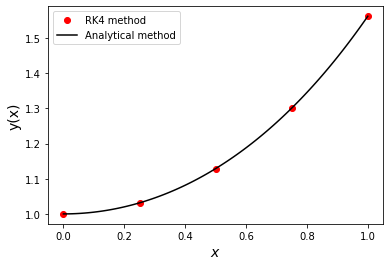

In [6]:
# Comapring the result graphically

plt.plot(t, y, 'ro', label='RK4 method')
plt.plot(t_range, y_analt, 'k-', label='Analytical method')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('y(x)', fontsize=14)
plt.legend()
plt.show()

## First order Differential equations

#### Radioactive Decay

>There are some elements in nature which spontaneously disintegrates by itself without any external influence. Such a process is called **radioactivity** and the elements are called *radioactive elements*.

The rate of decay of any radioactive elements is proportional to the number of elements present at that instant. 
\begin{align}
\frac{dN}{dt}=-\lambda N, \hspace{0.5cm}N(t_0)=N_0 \label{eq1}\tag{1}
\end{align}
The constant of proportionality ($\lambda$) is called *decay constant*. $N_0$ is the number of radioactive element present initially at time $t_0$. The decay constant $\lambda$ can be further expressed as
\begin{align}
\lambda=\frac{0.693}{T_{1/2}}\label{eqref{2}}\tag{2}
\end{align}
Here, $T_{1/2}$ is the half-life of the radioactive element during which half of the radioactive element will decay.

We like to simulate radioactivity for a known source. Hence we have to solve Equation (\ref{eq1}) with appropriate initial condition.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# basic parametrs
N0    = 10000      # initial number of atoms
T_half = 4.5*60
lamda = 0.693/T_half

# Discretize the independent variable 't'
t_init, t_final, step_size = 0, 1000, 0.1
t = np.arange(t_init, t_final, step_size)

# Create array for dependent variable "N"
N = np.zeros(len(t))
N_rk2 = np.zeros(len(t))
N_rk4 = np.zeros(len(t))
N[0] = N0
N_rk2[0] = N0

In [8]:
def model(N, t):
    return -lamda*N

def euler(N, t, h):
    k     = model(N, t)
    N_new = N + k*h
    return N_new

def rk2(N, t, h):
    k1 = model(N, t)
    k2 = model(N+k1*h/2, t+h/2)
    N_new = N + k2*h
    return N_new

In [9]:
# Loop to calculate the value of "N" at different "t" points
h = step_size
for i in range(len(t)-1):
    N[i+1] = euler(N[i], t[i], h)
    N_rk2[i+1] = rk2(N_rk2[i], t[i], h)

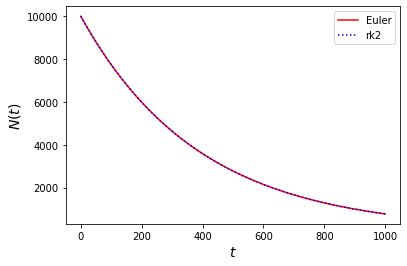

In [10]:
# Visualizing the simulation
plt.plot(t, N, 'r-', label='Euler')
plt.plot(t, N_rk2, 'b:', label="rk2")
plt.legend()
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$N(t)$', fontsize=14)
plt.show()

Simulation done by Euler method and RK2 method gives identical result.

We can solve the problem by taking the help of functions from Scipy. There are two functions - one is `odeint` which solves ordinary differential equation with appropriate initial conditions and the other one is `solve_ivp` which is for solving *initial value problem*.

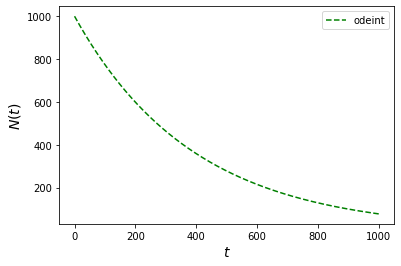

In [14]:
# Solving by odeint
from scipy.integrate import odeint
def model(N, t):
    return -lamda*N

T_half = 4.5*60
lamda = 0.693/T_half
t = np.linspace(0, 1000, 10000)
N0 = 1000
sol = odeint(model, N0, t)

plt.plot(t, sol[:,0], 'g--', label='odeint')
plt.legend()
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$N(t)$', fontsize=14)
plt.show()

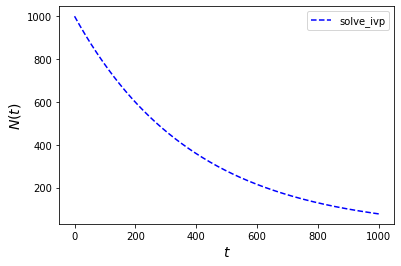

In [15]:
# using solve_ivp function
from scipy.integrate import solve_ivp

def model(t, N):
    return -lamda*N

T_half = 4.5*60
lamda = 0.693/T_half
t = np.linspace(0, 1000, 10000)
N0 = 1000
sol = solve_ivp(model, t_span=(t[0], t[-1]), y0 = [N0], t_eval=t)
t, y = sol.t, sol.y.T

plt.plot(t, y, 'b--', label='solve_ivp')
plt.legend()
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$N(t)$', fontsize=14)
plt.show()